# **AKBANK VERİ ANALİZİ BOOTCAMP 2024**

Bu proje Akbank Veri Analizi Bootcamp dokümantasyonu çerçevesinde gerçekleştirilmiştir.
Öncelikle kullanacağımız kütüphaneleri yüklüyoruz.

1. **PANDAS**: Veri manipülasyonu ve analizi için kullanılan güçlü bir araçtır.

2.  **NUMPY**: Python'da bilimsel hesaplamalar için kullanılan bir kütüphanedir.

3. **MATPLOTLIB**: Grafik oluşturmak için kullanılan bir kütüphanedir.

4. **SEABORN**: Matplotlib'e dayalı, istatistiksel veri görselleştirmesi için kullanılan bir kütüphanedir. Veri görselleştirmesi için daha yüksek seviyede araçlar sağlar.
5. **SKLEARN**: StandartScaler modülü, özelliklerin ölçeklendirilmesi için kullanılır. Özelliklerin ölçeklendirilmesi, veri özelliklerinin belirli bir aralığa ölçeklenmesini sağlar. Bu, özelliklerin birbirleriyle karşılaştırılabilir hale getirilmesine yardımcı olur. RFE ve lineer regresyon modüllerini de en iyi özellikleri seçmek için kullanacağız.

Öncelikle veri setimizi bir DataFrame'e yüklüyoruz. Veri setimiz, standart olarak verilen öğrenci performanslarıyla ilgili dosyadır.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
df = pd.read_csv("StudentsPerformance.csv")


Veri setimizi incelemek adına ilk 5 satırı görüntülüyoruz.

In [133]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Info()** ile kolonları, data type'larını, kaç tanesinin Non-Null olup olmadığına bakıyoruz.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Eksik Veri Tespiti**

**Isnull()** DataFrame içindeki her bir hücreyi kontrol ederiz ve hücre değerinin 'NaN' olup olmadığını belirleriz. Ardından, **sum()** yöntemi ile her sütundaki NaN değerlerinin sayısını toplarız.

In [135]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Bozuk Veri Tespiti**

Negatif değerler olabileceği için, **errors='coerce'** parametresi ile sayısal olan kolonlarda hatalı girişte 'Nan' yapıyoruz. Sonrasında yine eksik veri var mı diye bir sorgu gerçekleştiriyoruz. Sonuçlarda eksiklik ve negatiflik yok gözüküyor.

In [136]:
scores_df = df[['math score', 'reading score', 'writing score']]

numeric_scores_df = scores_df.apply(pd.to_numeric, errors='coerce')

numeric_scores_df.isnull().sum()


math score       0
reading score    0
writing score    0
dtype: int64

Aynı şekilde 0'dan küçük değerleri de kontrol ediyoruz. Yok gözüküyor.

In [137]:
numeric_scores_df[numeric_scores_df < 0].count()

math score       0
reading score    0
writing score    0
dtype: int64

**Görselleştirme**

DataFrame'de sayısal değerlerin görselleştirilmesi için boxplot kullanıyoruz. Matplotlib kütüphanesiyle de görselleştiriyoruz. Genel olarak okuma skorlarının ortalama daha yüksek olduğu göze çarpıyor.

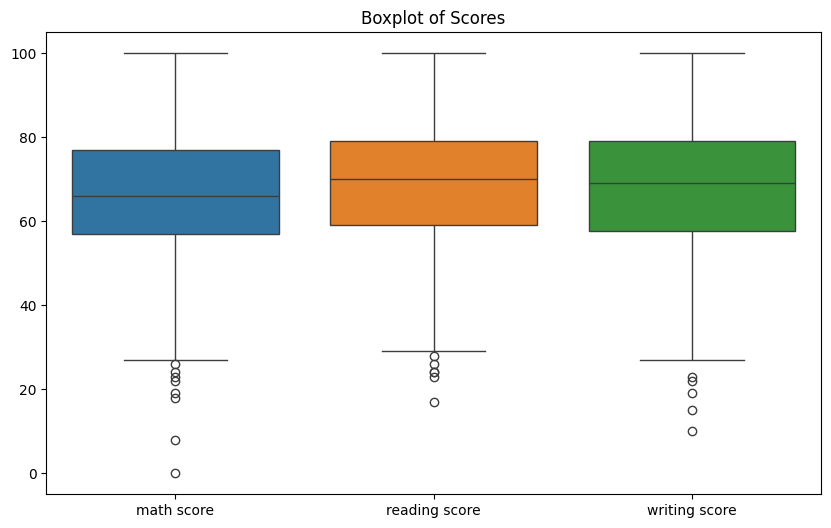

In [138]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot of Scores")
plt.show()

Temel istatistikleri görmek için **describe()** metodunu kullanıyoruz. Korelasyon için zemin hazırlıyoruz.

In [139]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Korelasyon**

Sadece sayısal verileri kullanacağımız için ekstra bir DataFrame'e aktarma yapıyoruz. Sonrasında **corr()** metoduyla matrisin ortaya çıkmasını sağlıyoruz. Sonuçlara göre "reading score" ile "writing score" arasındaki korelasyon 0.9546'dır. Hepsi arasında güçlü bir doğrusal ilişki vardır ancak en güçlü ilişkinin  bu iki özellik arasında olduğu söylenebilir.

In [140]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Scatterplot ile görselleştirdiğimizde de gerçekten ilişkileri aşırı doğrusal olduğu gözlemleniyor.

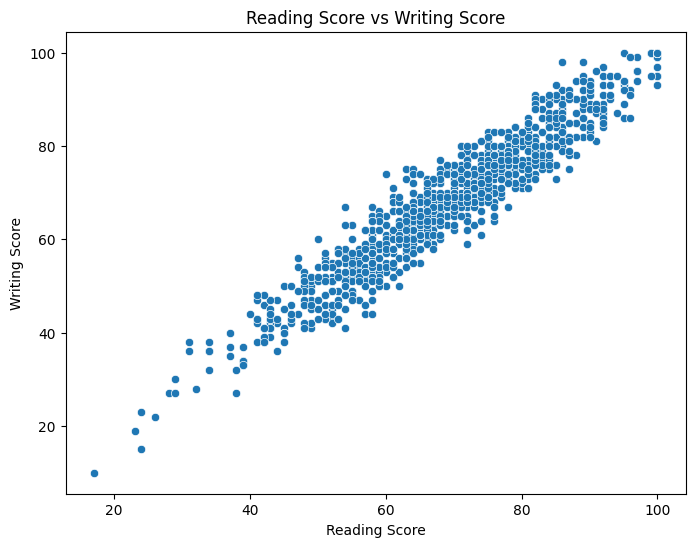

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='reading score', y='writing score')
plt.title('Reading Score vs Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

Korelasyon matrisini ekstradan renkli görselleştiriyoruz.

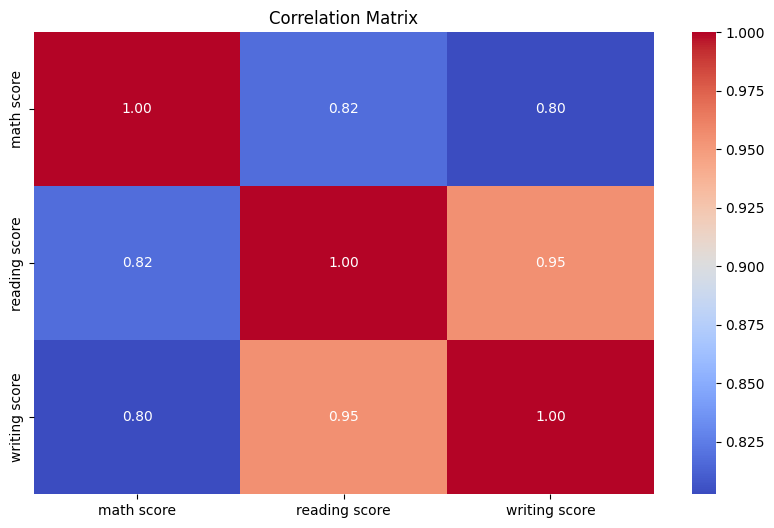

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Ekstradan başka ilişkilere bakacak olursak kadınlar ve erkeklerin farklı derslerdeki skorlarının ortalamasına bakacağız ve 3 tane histogram görselleştirmesi yapacağız. Aşağıdaki sonuçlar karşımıza çıkıyor. Buna göre kadınlar okuma ve yazmada nispeten erkeklere göre daha başarılı olduğu, erkeklerin ise yakın olmasına rağmen kadınlardan matematikte daha başarılı olduğu söylenebilir.

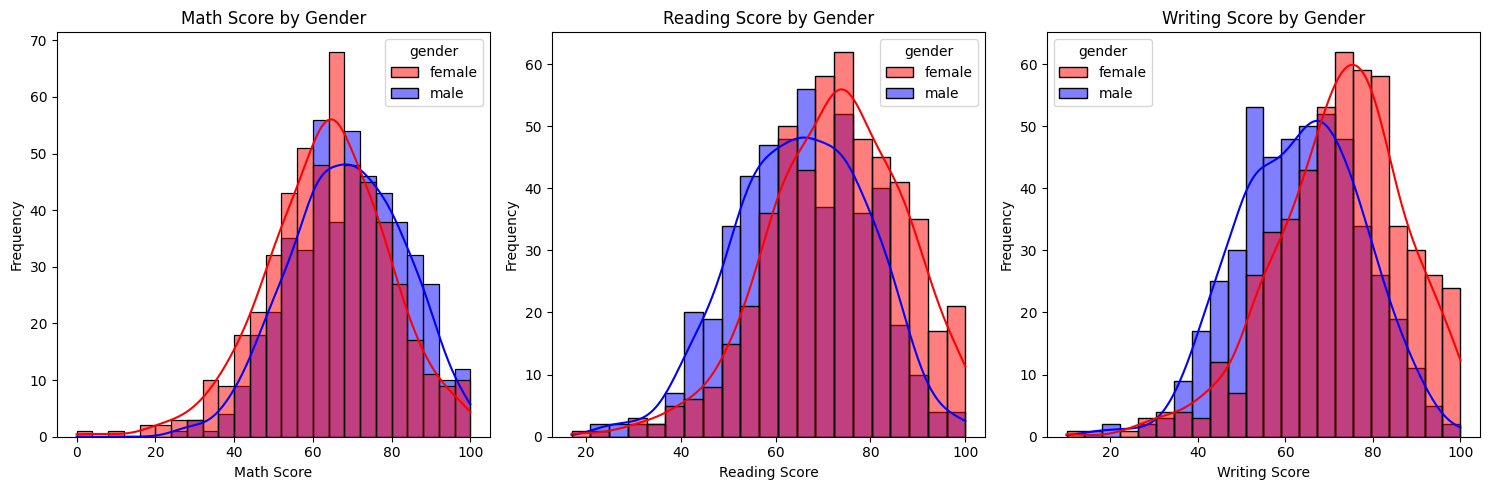

In [147]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='math score', hue='gender', kde=True, palette={'female': 'red', 'male': 'blue'})
plt.title('Math Score by Gender')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='reading score', hue='gender', kde=True, palette={'female': 'red', 'male': 'blue'})
plt.title('Reading Score by Gender')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='writing score', hue='gender', kde=True, palette={'female': 'red', 'male': 'blue'})
plt.title('Writing Score by Gender')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

 **Recursive** **Feature** **Elimination** **(RFE)** **(Sarma)**

Özellik seçimi için **sarma** işlemi yapmak mantıklıdır. Temelde lineer regresyon kullanmayı seçtim. Öncelikle toplam skordan yola çıkarak bu kolonu veri setinden çıkarıp bağımlı ve bağımsız değişken arayacağız. Modelimizi yükleme ve one-hot encoding işlemlerinden sonra bizim için en önemli 3 özelliği seçme kararı aldım. Ve sonuç olarak, özellikler matematik, okuma ve yazma notları olarak karşımıza çıkıyor.

In [149]:
df['total_score'] = (df['math score'] + df['writing score'] + df['reading score'])/3
X = df.drop(['total_score'], axis=1)
y = df['total_score']

X_encoded = pd.get_dummies(X)
model = LinearRegression()

rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_]
selected_features

Index(['math score', 'reading score', 'writing score'], dtype='object')

**Özellik Mühendisliği**

Bu işlem için öncelikle özelliklerin standartlaştırılmasını yapmak istiyoruz. Bunun için en önemli özellikler olan 'math score', 'reading score' ve 'writing score' sütunlarını ve 'total_score'u standartlaştırıyoruz. Yani bu değişkenlerin ortalamasını 0'a ve standart sapmasını 1'e dönüştürerek verilerin dağılımını standardize etmeye çalışıyoruz.

In [158]:
scaler = StandardScaler()
df[['math score', 'reading score', 'writing score', 'total_score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score','total_score']])

Görsellerle de destekliyoruz.

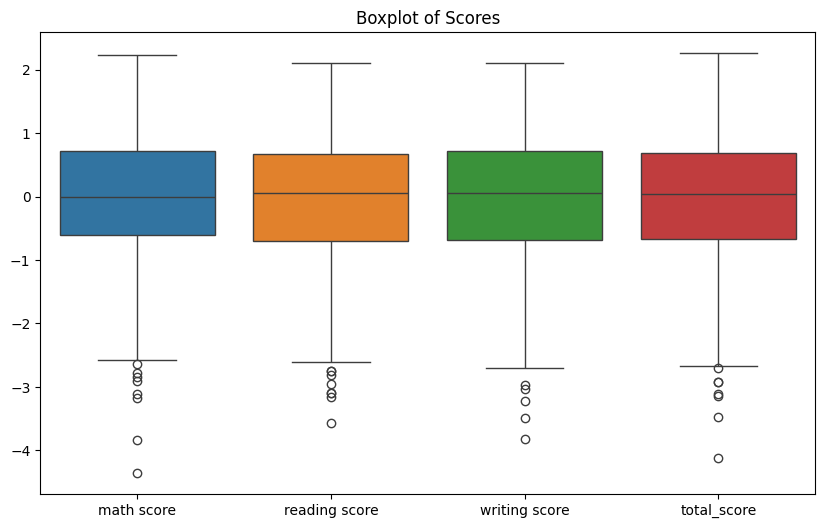

In [160]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot of Scores")
plt.show()

Çeşitli özellik değişimlerinden biri olan kategorik kolonların birinden boolean tipinde 2 kolon üretme işlemi yaptım örnek olarak.

In [161]:
df = pd.get_dummies(df, columns=['gender'])
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,gender_female,gender_male
0,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492,0.343574,True,False
1,group C,some college,standard,completed,0.192076,1.427476,1.313269,1.021927,True,False
2,group B,master's degree,standard,none,1.577711,1.770109,1.642475,1.747064,True,False
3,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744,-1.293830,False,True
4,group C,some college,standard,none,0.653954,0.605158,0.457333,0.600881,False,True


Total skorun logaritmasını içeren ekstra bir kolon ekledim. Numpy'ın logaritma işlemiyle gerçekleştiriyoruz.

In [166]:
df['total_score_log'] = np.log1p(df['total_score'])
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,gender_female,gender_male,total_score_log
0,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492,0.343574,True,False,0.295333
1,group C,some college,standard,completed,0.192076,1.427476,1.313269,1.021927,True,False,0.704051
2,group B,master's degree,standard,none,1.577711,1.770109,1.642475,1.747064,True,False,1.010533
3,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744,-1.293830,False,True,NaN
4,group C,some college,standard,none,0.653954,0.605158,0.457333,0.600881,False,True,0.470554


İlk baştaki gibi bozuk verilere baktığımızda yeni eklediğimiz log sütununda 164 adet Nan oluştuğunu görüyoruz.

In [167]:
scores_df = df[['math score', 'reading score', 'writing score','total_score','total_score_log']]

numeric_scores_df = scores_df.apply(pd.to_numeric, errors='coerce')

numeric_scores_df.isnull().sum()


math score           0
reading score        0
writing score        0
total_score          0
total_score_log    164
dtype: int64

Bu satırlara ortalamaya göre değer atıyoruz.

In [168]:
numeric_scores_df.fillna(numeric_scores_df.mean(), inplace=True)
numeric_scores_df

,math score,reading score,writing score,total_score,total_score_log
0,0.390024,0.193999,0.391492,0.343574,0.295333
1,0.192076,1.427476,1.313269,1.021927,0.704051
2,1.577711,1.770109,1.642475,1.747064,1.010533
3,-1.259543,-0.833899,-1.583744,-1.293830,-0.009012
4,0.653954,0.605158,0.457333,0.600881,0.470554
...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1.840630,1.044026
996,-0.269803,-0.970952,-0.859491,-0.732434,-1.318390
997,-0.467751,0.125472,-0.201079,-0.194430,-0.216205
998,0.126093,0.605158,0.589015,0.460532,0.378801


**Aykırı Değer Tespiti**

Aykırı değerler, genellikle diğer veri noktalarından belirgin bir şekilde farklı olan değerlerdir. Aykırı değerlerin tespiti için genellikle sütunlardaki değerlerin dağılımına bakılır. Aykırı değerler, belirli bir eşik değerinden, bizim çözümümüzde ortalama + 3 standart sapma, daha uzakta olan değerler olarak tanımlanabilir.Aykırı değerlerle başa çıkmak için, bunları silmek veya ortalama, medyan gibi daha tipik değerlerle değiştirmek mantıklı olacaktır.

In [174]:
def handle_outliers(col):
    std = numeric_scores_df[col].std()
    mean = numeric_scores_df[col].mean()
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std
    numeric_scores_df.loc[df[col] > upper_bound, col] = upper_bound
    numeric_scores_df.loc[df[col] < lower_bound, col] = lower_bound

handle_outliers('math score')
handle_outliers('reading score')
handle_outliers('writing score')
handle_outliers('total_score')
handle_outliers('total_score_log')
numeric_scores_df

,math score,reading score,writing score,total_score,total_score_log
0,0.390024,0.193999,0.391492,0.343574,0.295333
1,0.192076,1.427476,1.313269,1.021927,0.704051
2,1.577711,1.770109,1.642475,1.747064,1.010533
3,0.000000,0.000000,-1.240151,-1.253452,0.000000
4,0.653954,0.605158,0.457333,0.600881,0.470554
...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1.840630,1.044026
996,0.000000,0.000000,0.000000,0.000000,-0.749524
997,0.000000,0.125472,0.000000,0.000000,0.000000
998,0.126093,0.605158,0.589015,0.460532,0.378801


# **Sonuç**
Sonuç olarak bu projede notlarla ilgili bu verisetinin yapısını anladık, temizledik, bazı teknik çizimler gerçekleştirerek değişkenlerin birbiriyle ilişki dengelerini gözlemledik. Ardından veri setinin en önemli özelliklerini belirledik, bunları analiz ettik. Yeni özellikler ekledik. Sonuçlarımızın daha düzenli ve iyi sonuçlar vermeyi sağladığını rahatlıkla söyleyebiliriz.
